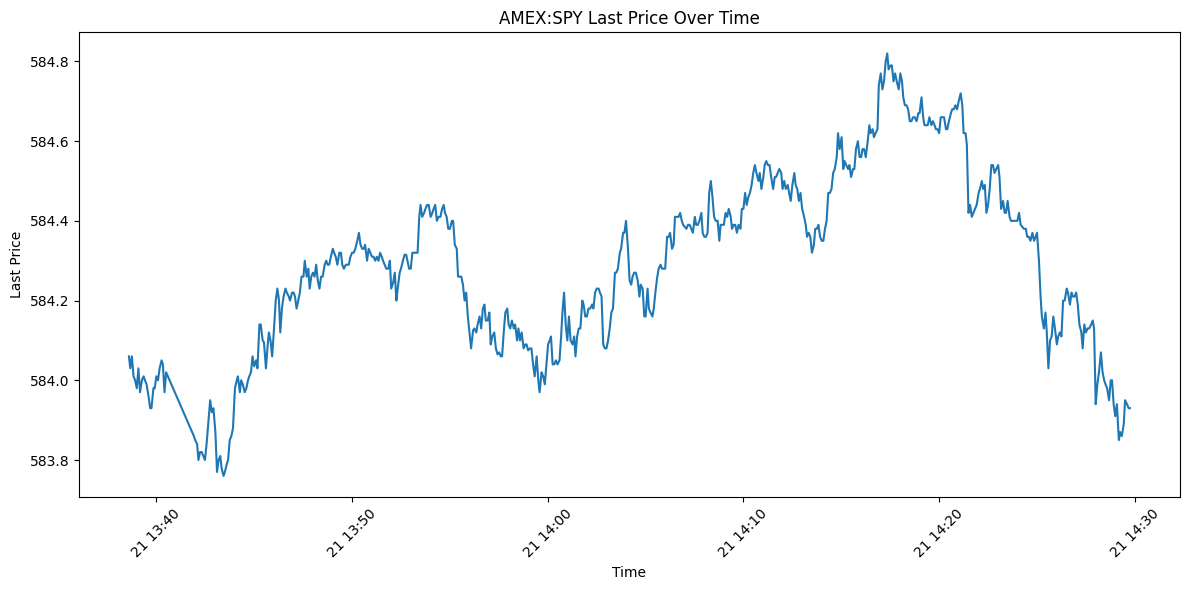

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define column names
columns = ['now', 'lp_time', 'quote_age', 'lp', 'ch', 'chp', 'volume', 'prev_close']

# Load the CSV file
df = pd.read_csv('../output/AMEX:SPY-regular-quote.csv', header=None, names=columns)

# Convert 'now' column to datetime
df['now'] = pd.to_datetime(df['now'], unit='s')

# Plot lp over time
plt.figure(figsize=(12, 6))
plt.plot(df['now'], df['lp'])
plt.title('AMEX:SPY Last Price Over Time')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()